# MatPlotLib Pyplot Tutorial

MatPlotLib은 공학에서 가장 많이 사용되는 수치 해석 소프트웨어 중 하나인 매트랩의 그래프 기능 혹은 시각화 기능을 파이썬에 구현한 라이브러리이다.  

## Pyplot  
- MatPlotLib의 하부 라이브러리  
- 매트랩에서 사용하는 커맨드 방식  
- 객체지향 API 제공으로 인해 체계적이고 세밀한 시각화 가능


In [3]:
#필요한 패키지를 import
import matplotlib.pyplot as plt

#jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

## 1. 1차원 리스트 그래프
- 1차원 리스트로 이루어진 변수 값들을 연결해서 그래프를 그림.
- x축은 리스트의 인덱스를 자동 할당.
- ylabel 혹은 xlabel로 y축이나 x축 라벨 지정 가능.

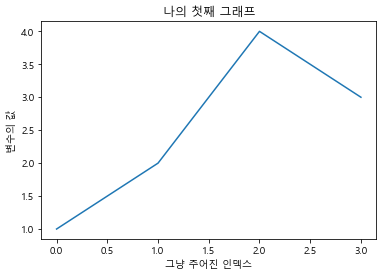

In [2]:
plt.plot([1,2,4,3])
plt.title('나의 첫째 그래프')
plt.xlabel('그냥 주어진 인덱스')
plt.ylabel('변수의 값')
plt.show()

## 2. 두개의 변수를 좌표로 사용하는 2차원 그래프
- plt.plot의 매개변수로 길이가 같은 두 개의 리스트를 줌.
- 좌표값 외에 'ro', 'b-' 등을 사용하여 점의 모양 지정 가능.
- plt.axis로 축의 범위 지정 가능.

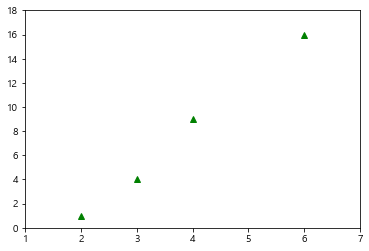

In [6]:
plt.plot([2,3,4,6],[1,4,9,16],'g^')
#'ro'는 붉은(r:red) 원(o:circle)으로 주어진 위치를 표시
# 'ro'를 사용하면 점은 연결되지 않는다
#'b-'는 blue, solid line을 의미한다.

plt.axis([1, 7, 0, 18])#축의 범위를 지정 [xmin, xmax, ymin, ymax]

# 혹은 아래와 같이 x축과 y축의 범위를 별도로 지정할 수 있다.
#plt.xlim(1, 9)
#plt.ylim(0, 20)

plt.show()

아래 예제에서는 y = f(x) 형태로 y값이 x의 함수로 정의된 것을 그래프로 시각화한 예제이며, 여러 그래프를 겹쳐서 그리는 것도 보여주고 있다.

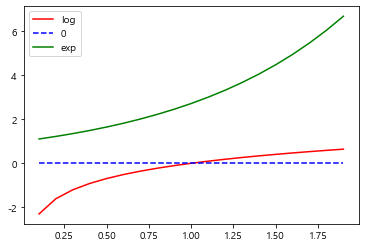

In [21]:
import numpy as np 
from math import log 

x = np.arange(0.1,2.,0.1)  # range()와는 달리 실제로 값이 생성되어 ndarray로 저장
plt.plot(x, np.log(x),'r')
plt.plot(x, x*0, 'b--')
plt.plot(x,np.exp(x),'g') 
plt.legend(['log','0','exp'])# 그래프를 그린 순서에 따라 범례를 표시
plt.show()

## 3. 막대 그래프 (bar chart) 그리기

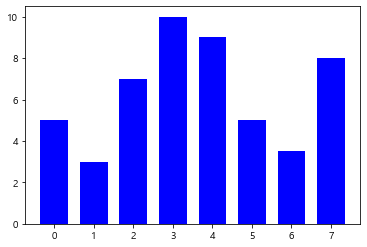

In [21]:
y = [ 5, 3, 7, 10, 9, 5, 3.5, 8]
x = range(len(y))
#x = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
plt.bar(x, y, width=0.7, color="blue")
plt.show()


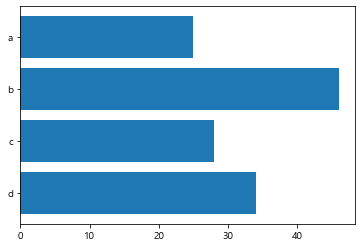

In [23]:
# 수평 막대 그래프로도 많이 사용됨 
names = ['a', 'b', 'c', 'd']
weights = [25, 46, 28, 34]

#plt.barh(names, weights) #기본적으로 각 막대는 원점에서부터 순서대로 그려진다. 
# 따라서 현재 상태로 그리면 위에서부터 역순으로 그려진 것처럼 보인다.
#아래와 같이 names와 weights를 역순으로 바꿔서 그리면 위에서부터 순서대로 그릴 수 있다.
plt.barh(names[::-1], weights[::-1])
plt.show()

막대를 원하는 기준으로 정렬하여 그리고 싶으면 sorted 이용해서 정렬 후 그리는 것이 가능하다. 

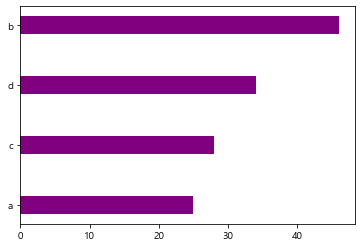

In [35]:
sorted_w = sorted(zip(names, weights), key=lambda kv: kv[1])
n, w = zip(*sorted_w)

plt.barh(n, w, height=0.3, color='purple')
plt.show()

In [30]:
w #w가 정렬된 순서를 확인

(25, 28, 34, 46)

## 4. 파이 차트 그리기 

https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html

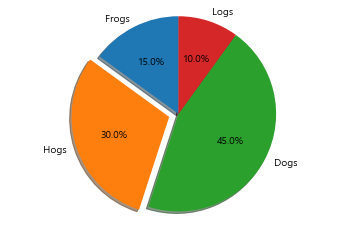

In [38]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs','Hogs', 'Dogs', 'Logs' #각 파이의 label
sizes = [15, 30, 45, 10] #각 파이의 크기 
explode = (0, 0.1, 0, 0)  # 각 파이에 대해 중앙으로부터의 거리 지정, 여기서는 두번째 파이를 강조하기 위해 떼어냄

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle = 90)
#autopct: 파이의 값을 보여주기 위한 포맷팅, 소숫점이하 한 자리
#shadow: 그림자 여부
#startangle: 시작 위치를 지정, 90이면 y축 양의 방향에서 출발

plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 5. 히스토그램 그리기 

https://matplotlib.org/gallery/statistics/hist.html

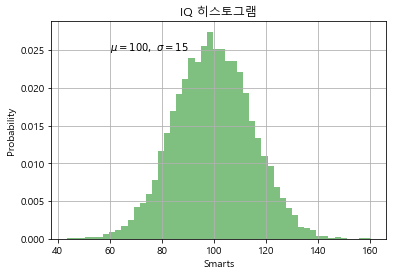

In [41]:
import numpy as np
# random 함수를 사용할 때, reproducibility(재생산성)을 위해 seed를 지정
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000) #정규분포에 가깝게 10000개의 값을 생성

# bins는 나누어서 보여 줄 칸의 수
# density가 True이면 y축을 확률로 변경, False이면 Count
plt.hist(x, bins=50, density=True, facecolor='g', alpha=0.5) # facecolor:내부색깔, alpha:투명도 조정
#plt.hist(x, bins=50)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('IQ 히스토그램')
plt.text(60, .025, '$\mu=100,\ \sigma=15$') # (60, 0.025) 좌표에 텍스트를 출력, $로 감싸서 TeX 수식 사용 가능
#plt.axis([40, 160, 0, 0.03]) #y축을 확률로 가정하고 적절한 범위를 지정, 만일 count로 하게 되면 조정이 필요
plt.grid(True)
plt.show()

In [27]:
len(x)

10000

## 6. 여러 그래프를 겹쳐서 그리기
- 매개변수로 x,y 쌍을 연속으로 할당 하면 여러 그래프를 동시에 그릴 수 있다.
- 리스트가 아닌 numpy array로 그래프를 그릴 수 있다.
- 리스트를 비롯한 모든 sequence 내부에서 numpy array로 변환된다.

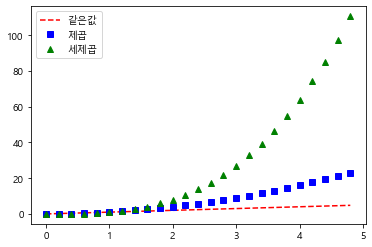

In [5]:
import numpy as np 

#evenly sampled time at 200ms intervals
t = np.arange(0.,5.,0.2)

#red dashes, blue squares and green triangles 
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')

# 아래와 같이 나눠서 하는 것도 가능
#plt.plot(t, t, 'r--')
#plt.plot(t, t**2, 'bs')
#plt.plot(t, t**3, 'g^')

plt.legend(['같은값', '제곱', '세제곱']) #범례 추가 시 그린 plot 수 만큼 지정 가능

plt.show()

## 7. 선 속성 설정하기
- step() 함수를 이용하여 선 굵기, 모양 등 다양한 속성 설정 가능

line 속성 값은 아래와 같다.

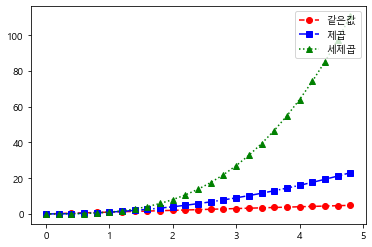

In [39]:
#ebenly sampled time at 200ms intervals 
t = np.arange(0.,5.,0.2)

line1 = plt.plot(t, t, label ='같은값') #plot을 그릴 때 label 지정 가능
line2 = plt.plot(t, t**2, label = '제곱')
line3 = plt.plot(t, t**3, label='세제곱')

plt.setp(line1, color='red', linestyle='--', marker='o')
plt.setp(line2, color='blue', linestyle='-.', marker='s')
plt.setp(line3, color='green', linestyle=':', marker='^')

plt.legend(loc ='upper right') #지정된 label을 이용해서 범례(legend)를 그림, loc은 legend의 위치를 지정

plt.show()

In [40]:
#line에 할당할 수 있는 property 값 확인
plt.setp(line1)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: colo

## 8.화면을 분할하여 여러 그래프를 그리기

https://matplotlib.org/gallery/subplots_axes_and_figures/subplots_demo.html https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots

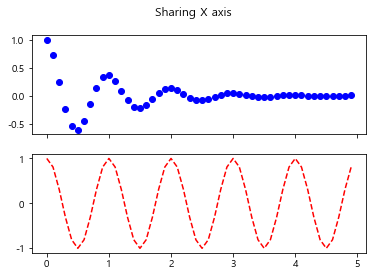

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


In [7]:
def f_graph(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

x = np.arange(0.0, 5.0, 0.1)
f, axarr = plt.subplots(2, sharex=True) # ncols는 생략, nrows는 2, 즉 두 개의 row로 된 subplot을 생성
# shareX, shareY는 각각 x축 혹은 y축을 공유할 지 여부

# f는 전체 그림판, axarr은 나누어진 두 개의 subplot을 array로 반환
f.suptitle('Sharing X axis')

axarr[0].plot(x, f_graph(x), 'bo') #첫째 subplot에 그림을 그림
axarr[1].plot(x, np.cos(2*np.pi*x), 'r--') #둘째 subplot에 그림을 그림
plt.show()

print(t)